# Morphological Operators:

Morphological Operators are set of kernels that can achieve a variety of effects, such as reducing noise.

Certain Operators are very good at reducing black points on a white backgroun and vice versa.

Certian Operators can also achieve an erosion and dilation effect that can add or erode from an existing image.(This effect is most easily seen on text data.)



In [150]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [151]:
def load_img():
    blank_img = np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCDE',org=(50,300),fontFace=font,color=(255,255,255),thickness=25,fontScale=5,lineType=cv2.LINE_AA)
    return blank_img

In [152]:
def display_img(img):
    fig = plt.figure(figsize= (12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,"gray")

In [153]:
img = load_img()

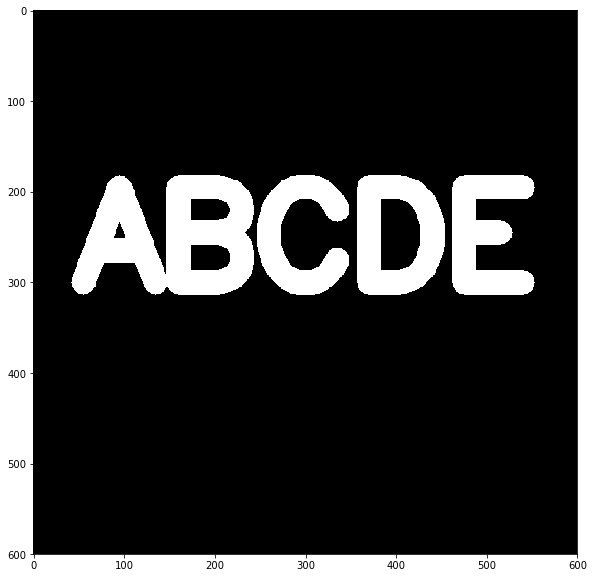

In [154]:
display_img(img)

### Morphological Operators are set of kernels that can achieve a variety of effects

## Erosion: it basically erodes away boundaries of foreground objects;

In the above image if we see, text is in the foreground and black image is just a background.

with the help of this kernel we are gonna detect the edges between foregorund text oultine and the background and try to erode away that boundary.

In [155]:
kernel = np.ones((5,5),dtype=np.uint8)
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [156]:
results = cv2.erode(img,kernel,iterations=4)
# we can play around the different kernel size and values... irerations is how many pass we want...

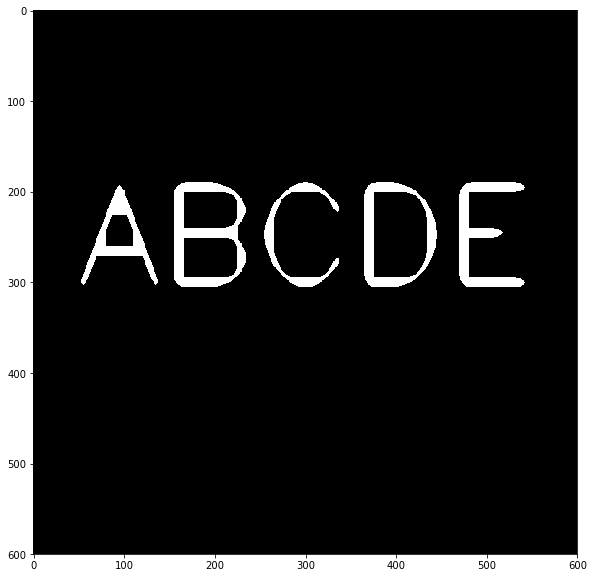

In [157]:
display_img(results)

## If we look closely, the erosion between A and B is quiet strong in the first image than the second one.  (results of iterations = 1)

## but if we take more iterations, the results would be much different... find it out yourself.

# Opening: its an erosion followed by dilation ( method used to remove background noise)

dilation is basically the opposite of erosion, it end up adding more to that foreground, 

however, what actually useful about Opening is that is useful in removing backgorund noise....

### lets create some white noise and put it on to our original image.

In [158]:
img = load_img()

In [159]:
# Lets create some white noise for the image

white_noise = np.random.randint(low=0,high=2,size=(600,600))
white_noise

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 1, 1, 0]])

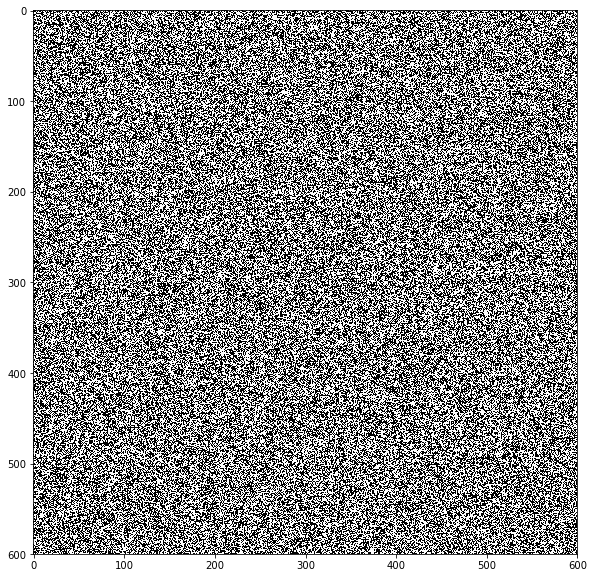

In [160]:
display_img(white_noise)

# what we can see is just a noise, random spots for whites , random spots of black.

### Now lets put this random white noise in to our original text image...

lets take a look at out origianl image...

In [161]:
img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [162]:
img.max()

255.0

So Now what we can do is ,convert our white noise array in to 0's and 255's array...

In [163]:
white_noise = white_noise * 255
white_noise

# So this is how we can make it as the same scale as our original image...

array([[  0,   0,   0, ..., 255,   0,   0],
       [  0,   0,   0, ..., 255,   0,   0],
       [  0, 255, 255, ..., 255, 255,   0],
       ...,
       [  0,   0,   0, ..., 255, 255,   0],
       [  0,   0,   0, ..., 255,   0,   0],
       [  0, 255,   0, ..., 255, 255,   0]])

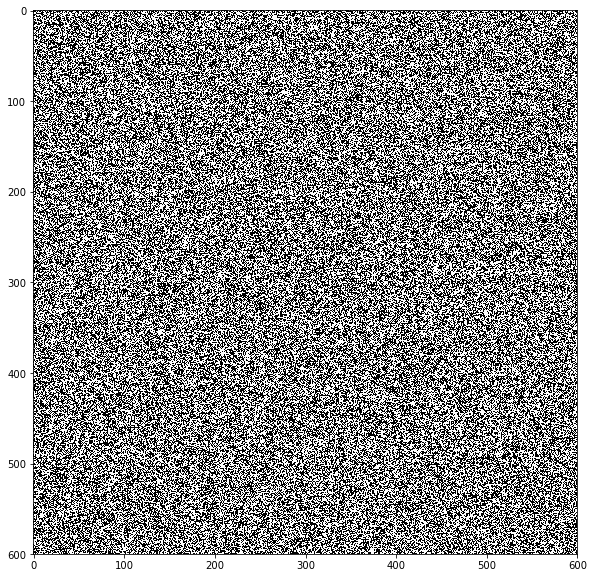

In [164]:
# the white noise image still remains the same...
display_img(white_noise)

## So now we can combine our noise and original image as following way..

In [165]:
noise_img = white_noise + img

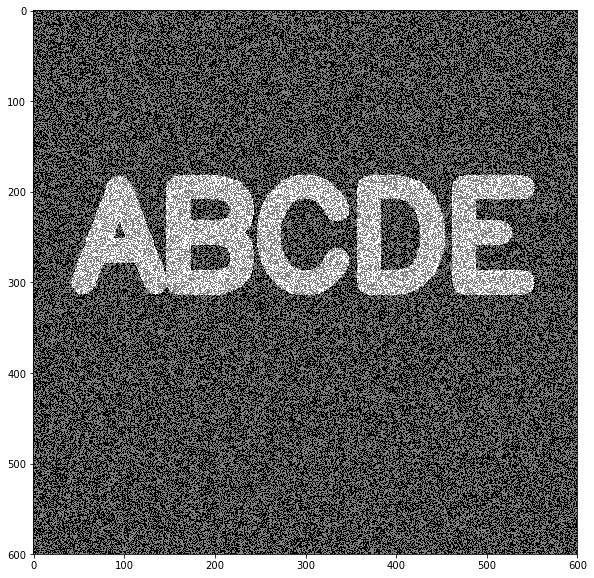

In [166]:
display_img(noise_img)

What we basically did is, we added all those 0's and 255's value in to our original image...

# As we done adding white noise on to our image, 

# Now we use Opening, which is a technique of a Morphological operator to get rid of Background noise...

In [167]:
opening =cv2.morphologyEx(noise_img,cv2.MORPH_OPEN,kernel)


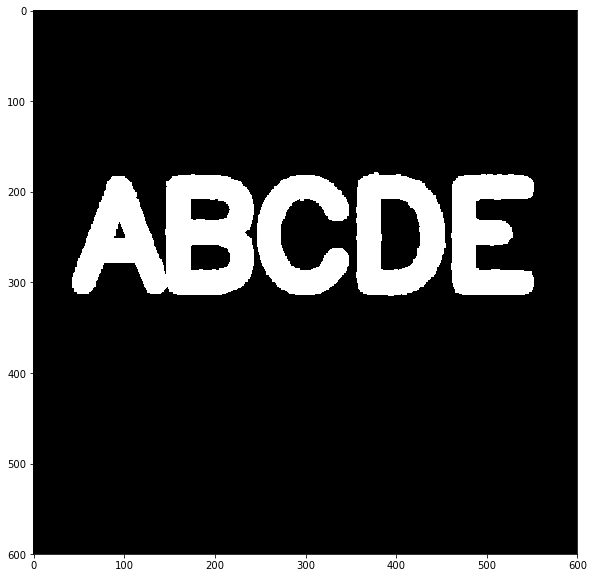

In [168]:
display_img(opening)

SO this is how we can clear out most of the noise without too much distortion of the original text.

### but its not as clear as the original one (please note that)
See the difference below...

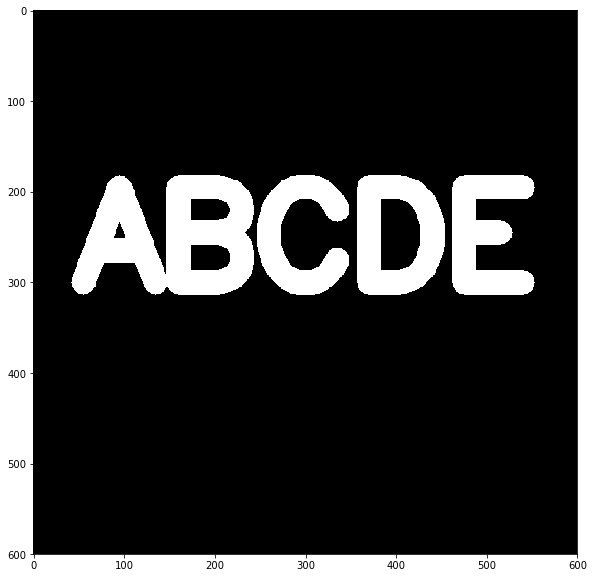

In [169]:
display_img(img)

### basically all openings are erosion followed by dilation..

# Now let's try to remove Foregorund Noise...

Lets create an image that has foregorund noise...

In [170]:
img = load_img()

In [171]:
black_noise = np.random.randint(0,2,size =(600,600))

In [172]:
black_noise
# this essentially looks like the white noise, but ...

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       [0, 1, 1, ..., 0, 1, 1],
       ...,
       [1, 0, 1, ..., 1, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [173]:
black_noise = black_noise * -255

In [174]:
black_noise
# so this is not gonna affect the black ( since it is black noise itself) but would affect white in the image...

array([[   0,    0,    0, ...,    0,    0,    0],
       [   0, -255, -255, ..., -255, -255,    0],
       [   0, -255, -255, ...,    0, -255, -255],
       ...,
       [-255,    0, -255, ..., -255,    0, -255],
       [-255,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0, -255]])

In [175]:
black_noise_img  = black_noise + img

In [176]:
black_noise_img  # we can see an array of 0's and -255's of the combined image(note that...)

array([[   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0., -255., -255., ..., -255., -255.,    0.],
       [   0., -255., -255., ...,    0., -255., -255.],
       ...,
       [-255.,    0., -255., ..., -255.,    0., -255.],
       [-255.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0., -255.]])

### now we are gonna bring back all the -255's up to 0's, coz it doesnot make sense, the  value shoud be either 0 or 255

The reason we did in the first place to is ....what black_noise_img did is , it randomly subtracted 255 from the every single pixel of the original image, means the black one which were "0" went down to -255 and white one "255" went down to 0.... 

so what we did above was to bring that original value of black pixel to its default value...

### So now we replace all -255's to 0 by indexing...
we can do this with numpy array multiplication as well, but not reliable in case we have another values other than zeros in an array... because array multplication is applicable to every single element of an array... Note that.

In [179]:
black_noise_img[black_noise_img == -255] = 0

In [180]:
black_noise_img.min()

0.0

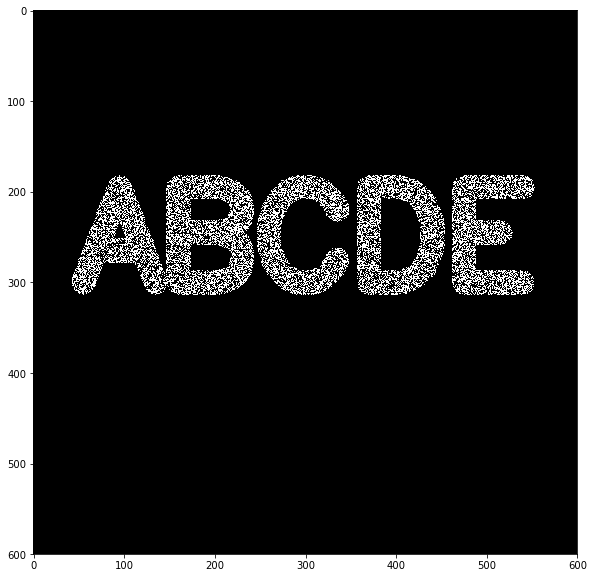

In [181]:
display_img(black_noise_img)

So now we have bunch of black points on the foreground...

# So, now we can use Closing... in attempt to clean this up...

In [182]:
closing = cv2.morphologyEx(black_noise_img,cv2.MORPH_CLOSE,kernel)

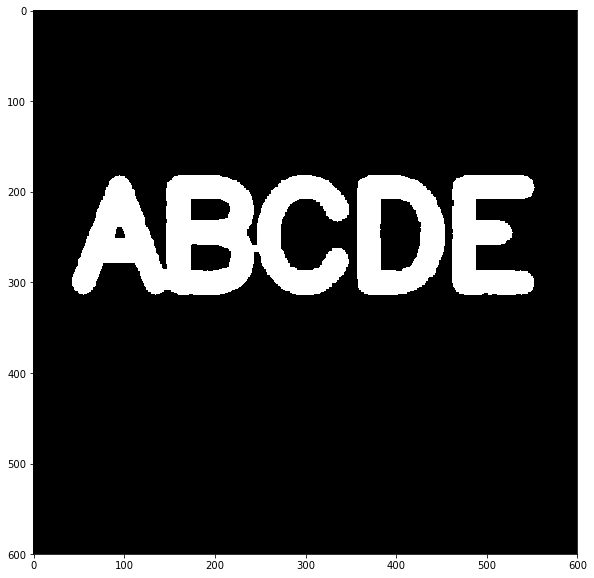

In [183]:
display_img(closing)

Notice again, its clearly not perfect as original....

Tip: we can try different kernel sizes and values.... 

# Morphological Gradient: 

it just take a differrence between dilation and erosion of an image...

In [184]:
img = load_img()

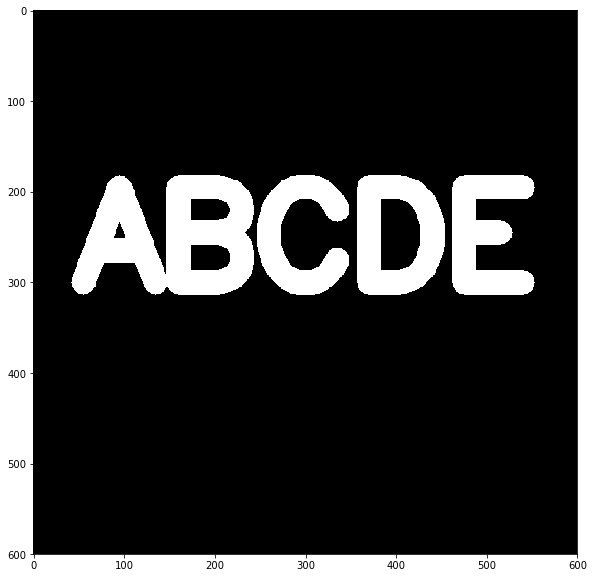

In [185]:
display_img(img)

NOW AS WE KNOW, 

    if we do erosion, it would began to get rid between the background and foreground edge...
    
    if we do dilation, it would actually end up adding more, we can actullly see letters more bubbly
    
### and Morphological Gradiant take difference between those two...

In [186]:
gradiant = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)

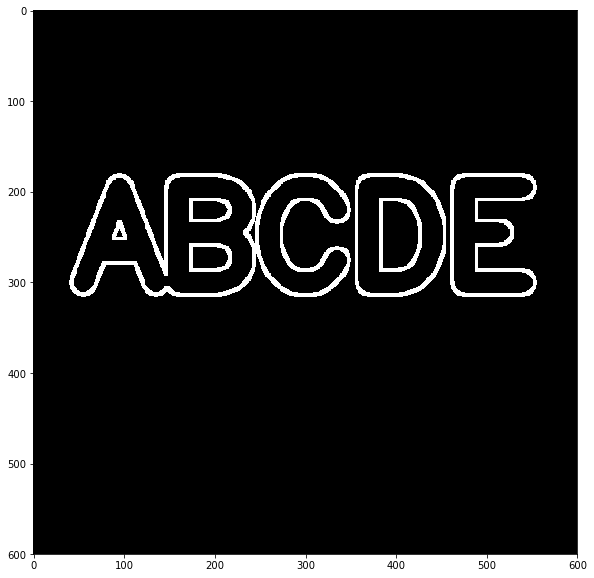

In [187]:
display_img(gradiant)

As you see above, this is the difference beween erosion and dilation...